In [185]:
# Импорт необходимых библиотек
import pandas as pd


In [186]:
import csv
import random
# Установка количества строк для набора данных
rows = 1000
# Открытие CSV-файла для записи
with open('travel_data.csv', 'w') as f:
    # Создание объекта записи CSV
    writer = csv.writer(f)
    # Запись заголовочной строки
    writer.writerow(['age', 'city', 'salary', 'family', 'transport', 'target', 'gender'])
    # Генерация случайных данных для каждой строки
    for _ in range(rows):

        age = random.randint(18, 60)
        city = random.choice(['Бишкек', 'Ош', 'Джалал-Абад'])
        salary = random.randint(20000, 80000)
        family = random.choice(['холост', 'женат/замужем', 'дети'])
        transport = random.choice(['самолет', 'автобус', 'машина'])
        target = random.choice(['Стамбул', 'Дубай', 'Москва'])
        gender = random.choice(['Мужской', 'Женский'])
        # Запись сгенерированных данных в CSV-файл
        writer.writerow([age, city, salary, family, transport, target, gender])

In [187]:
# Чтение CSV-файла в DataFrame
df = pd.read_csv('travel_data.csv')
data1=df.copy(deep=True)
# Проверка наличия пропущенных значений в DataFrame
df.isnull().sum()

age          0
city         0
salary       0
family       0
transport    0
target       0
gender       0
dtype: int64

In [188]:
# Импорт LabelEncoder для кодирования категориальных переменных
from sklearn.preprocessing import LabelEncoder
# Указание категориальных столбцов
categorical_cols = ['city', 'family', 'transport', 'target', 'gender']

# Создаем экземпляр LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем каждый категориальный столбец
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())

   age  city  salary  family  transport  target  gender
0   34     0   22173       1          1       2       1
1   39     1   44181       2          0       0       1
2   57     1   40094       1          1       1       1
3   35     2   24867       1          0       2       1
4   19     1   20834       0          0       0       0


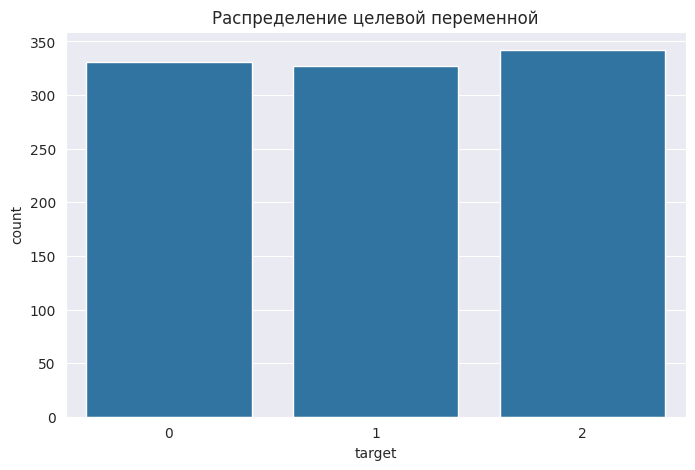

In [189]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df)
plt.title('Распределение целевой переменной')
plt.show()

In [190]:
# Отделение признаков (X) и целевой переменной (y)
X = df.drop(['target'], axis=1)
y = df['target'].values



In [191]:
# Нормализация данных с использованием StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация признаков с использованием StandardScaler
X_train_normalized = StandardScaler().fit_transform(X_train)
X_test_normalized = StandardScaler().fit_transform(X_test)

In [192]:
# Импорт LogisticRegression
from sklearn.linear_model import LogisticRegression

# Создание модели логистической регрессии с указанными гиперпараметрами
logreg = LogisticRegression(C=0.01, solver='liblinear', random_state=42)

# Обучение модели на обучающих данных
logreg.fit(X_train, y_train)


LogisticRegression(C=0.01, random_state=42, solver='liblinear')

In [193]:
from sklearn.metrics import accuracy_score
# Вычисление и отображение показателя точности на обучающем наборе
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.3600
Test set score: 0.3300


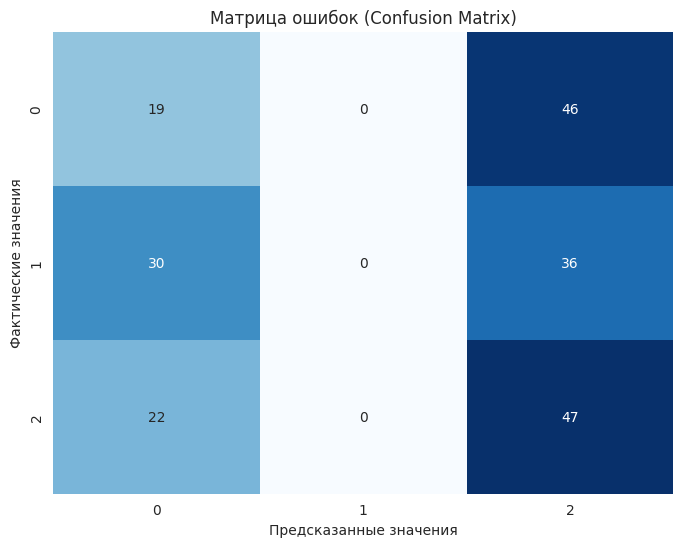

In [194]:
from sklearn.metrics import confusion_matrix

y_pred_test = logreg.predict(X_test)

# Вычисление матрицы ошибок
cm = confusion_matrix(y_test, y_pred_test)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Матрица ошибок (Confusion Matrix)')
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.show()


In [195]:
from sklearn.model_selection import cross_val_score

# Выполнение 5-кратной кросс-валидации и отображение среднего показателя
scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')


In [196]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.3480


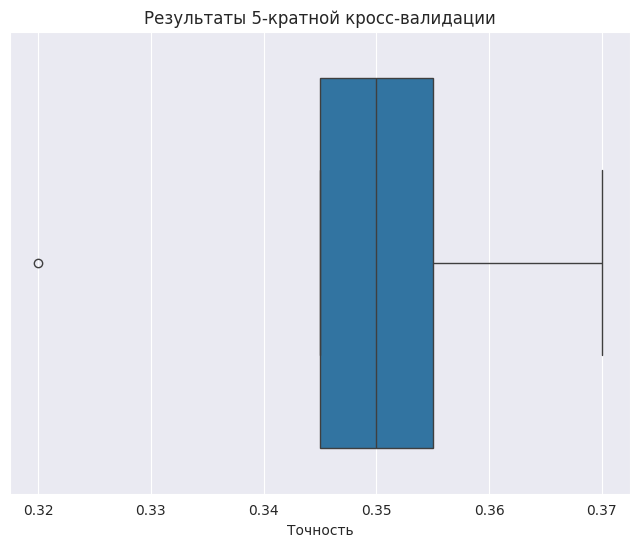

In [197]:
# Визуализация результатов кросс-валидации
plt.figure(figsize=(8, 6))
sns.boxplot(x=scores)
plt.title('Результаты 5-кратной кросс-валидации')
plt.xlabel('Точность')
plt.show()


In [198]:
# Импорт GridSearchCV для настройки гиперпараметров
from sklearn.model_selection import GridSearchCV


# Указание параметров для GridSearchCV
parameters = [{'penalty': ['l1', 'l2']},
              {'C': [1, 10, 100, 1000]}]

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=logreg,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           verbose=0)

# Обучение объекта GridSearchCV на данных
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=0.01, random_state=42,
                                          solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [199]:
# Отображение лучшего показателя кросс-валидации, лучших параметров и выбранного оценщика
print('Лучший показатель GridSearch CV: {:.4f}\n\n'.format(grid_search.best_score_))
print('Параметры, дающие лучшие результаты:\n\n', (grid_search.best_params_))
print('\n\nОценщик, выбранный по результатам поиска:\n\n', (grid_search.best_estimator_))

Лучший показатель GridSearch CV: 0.3500


Параметры, дающие лучшие результаты:

 {'penalty': 'l1'}


Оценщик, выбранный по результатам поиска:

 LogisticRegression(C=0.01, penalty='l1', random_state=42, solver='liblinear')


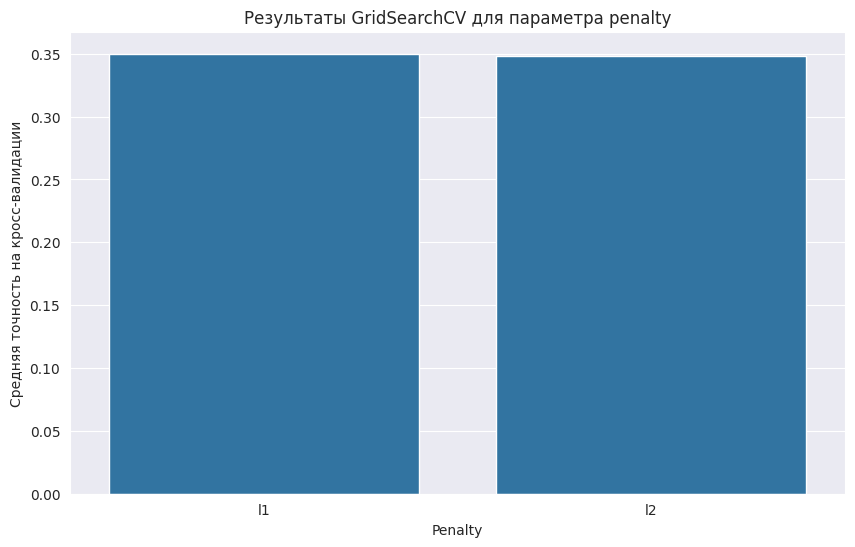

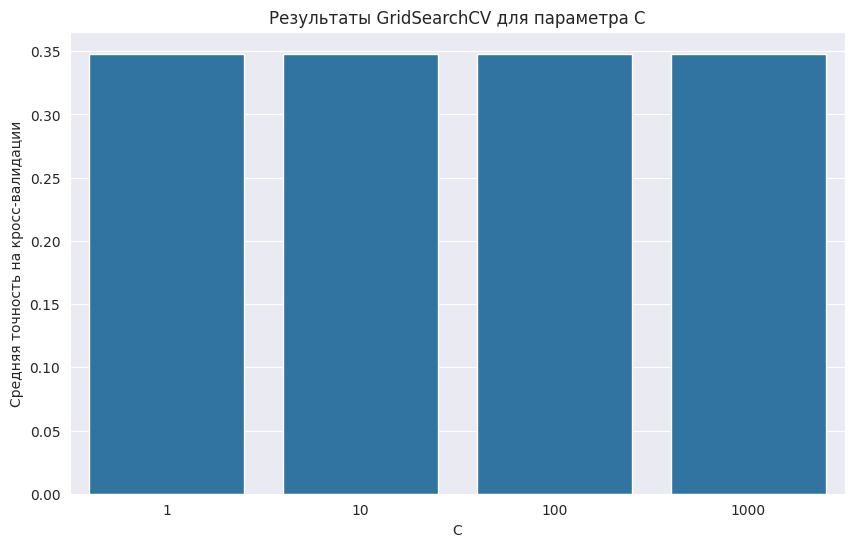

In [200]:
# Визуализация результатов GridSearchCV для параметра penalty
penalty_results = grid_search.cv_results_['param_penalty']
penalty_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
sns.barplot(x=penalty_results, y=penalty_scores)
plt.title('Результаты GridSearchCV для параметра penalty')
plt.xlabel('Penalty')
plt.ylabel('Средняя точность на кросс-валидации')
plt.show()

# Визуализация результатов GridSearchCV для параметра C
C_results = grid_search.cv_results_['param_C']
C_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
sns.barplot(x=C_results, y=C_scores)
plt.title('Результаты GridSearchCV для параметра C')
plt.xlabel('C')
plt.ylabel('Средняя точность на кросс-валидации')
plt.show()

<h2>Генерация данных: Я создал набор данных, представляющий информацию о путешествиях людей. В этом наборе данных содержатся различные признаки, такие как возраст, город, зарплата, семейное положение, вид транспорта и цель поездки. Этот набор данных может быть использован для моделирования и анализа поведения клиентов или пассажиров.

<h2>Подготовка данных: С использованием библиотеки pandas, я провел анализ данных, проверил наличие пропущенных значений и закодировал категориальные переменные с помощью LabelEncoder.

<h2>Обучение модели: Я применил логистическую регрессию для классификации целевой переменной, представляющей выбор города для поездки (Стамбул, Дубай, Москва). Модель была обучена на обучающем наборе данных.

<h2>Оценка производительности модели: Я оценил производительность модели на тестовом наборе данных с использованием метрик точности и ROC-кривой. Кроме того, я применил кросс-валидацию для более устойчивой оценки модели. После этого, я использовал GridSearchCV для настройки гиперпараметров модели и выбора наилучших параметров.

<h1>Случайные данные: Поскольку датасет был создан случайным образом, в нем может быть большое количество шума и случайных корреляций между признаками и целевой переменной. Кросс-валидация и тюнинг гиперпараметров могут не полностью устранить влияние случайных закономерностей, и, следовательно, производительность модели может оставаться низкой.

<h1>Неинформативные признаки: Сгенерированные данные могут содержать признаки, которые на самом деле не имеют важности для целевой переменной. В результате кросс-валидации может быть сложно выделить информативные признаки, что влияет на производительность модели.

<h1>Неучтенные паттерны: Случайные данные могут содержать неучтенные паттерны или зависимости, которые не были учтены в модели. Это также может ограничить способность модели обобщать на новые данные.

<h1>Ограниченный объем данных: Возможно, что объем данных недостаточен для построения более точной модели. В контексте случайных данных, увеличение объема данных может быть ключевым фактором для улучшения производительности модели.

<h1>В целом, когда модель сталкивается с данными, созданными случайным образом, ожидать значительного улучшения производительности может быть сложно из-за особенностей, связанных с случайными закономерностями в данных.